In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [3]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [4]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [5]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [6]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [9]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [10]:
df['Hour'] = df['EDTdate'].dt.hour

In [11]:
df['AMorPM'] = np.where(df['Hour']<12, 'am', 'pm')

In [12]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [13]:
df['Weekday'] = df['EDTdate'].dt.strftime('%a')

In [14]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [15]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [16]:
y_col = ['fare_amount']

In [17]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int32
AMorPM                            object
Weekday                           object
dtype: object

In [18]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [19]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [20]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [21]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [22]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [23]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [24]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [25]:
cats = np.stack([hr,ampm,wkdy], axis=1)

In [26]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [27]:
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [28]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [29]:
cats = torch.tensor(cats, dtype=torch.int64)

In [30]:
conts = np.stack([df[col].values for col in cont_cols], 1)

In [31]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [32]:
conts = torch.tensor(conts, dtype = torch.float)

In [33]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [34]:
y = torch.tensor(df[y_col].values, dtype=torch.float)

In [35]:
cats.shape

torch.Size([120000, 3])

In [36]:
conts.shape

torch.Size([120000, 6])

In [37]:
y.shape

torch.Size([120000, 1])

In [38]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [39]:
cat_szs

[24, 2, 7]

In [40]:
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]

In [41]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [42]:
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [43]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni, nf in emb_szs])

In [44]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [45]:
embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [46]:
embeddingz

[tensor([[ 0.7696, -0.1100,  0.1155,  0.6343,  2.0568, -1.4671, -0.1716,  1.6234,
           2.0787,  0.1130, -0.6917,  2.1274],
         [ 0.2559,  1.8627,  1.8690, -0.9681,  1.3377, -0.7024, -0.5569,  0.8800,
           0.1833, -0.3359, -0.5439,  1.5982],
         [-1.7418, -1.5808, -0.2878, -1.2780,  2.8410, -0.4847,  0.5077,  0.0788,
           0.0860, -0.1035,  0.0561,  0.1321],
         [-0.9175, -0.3542,  0.5376, -0.4821, -0.2402,  0.8574, -0.8497, -0.6648,
          -0.7829,  0.8582, -0.9883,  0.9500]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.1967],
         [-0.1967],
         [-0.1967],
         [-0.0674]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.8227,  1.1381, -1.2668, -1.0574],
         [ 0.0068,  0.8920, -0.0344,  0.1913],
         [ 0.0068,  0.8920, -0.0344,  0.1913],
         [-0.9496, -0.3290, -0.7314,  0.4348]], grad_fn=<EmbeddingBackward0>)]

In [47]:
z = torch.cat(embeddingz,1)

In [48]:
z

tensor([[ 0.7696, -0.1100,  0.1155,  0.6343,  2.0568, -1.4671, -0.1716,  1.6234,
          2.0787,  0.1130, -0.6917,  2.1274, -0.1967, -0.8227,  1.1381, -1.2668,
         -1.0574],
        [ 0.2559,  1.8627,  1.8690, -0.9681,  1.3377, -0.7024, -0.5569,  0.8800,
          0.1833, -0.3359, -0.5439,  1.5982, -0.1967,  0.0068,  0.8920, -0.0344,
          0.1913],
        [-1.7418, -1.5808, -0.2878, -1.2780,  2.8410, -0.4847,  0.5077,  0.0788,
          0.0860, -0.1035,  0.0561,  0.1321, -0.1967,  0.0068,  0.8920, -0.0344,
          0.1913],
        [-0.9175, -0.3542,  0.5376, -0.4821, -0.2402,  0.8574, -0.8497, -0.6648,
         -0.7829,  0.8582, -0.9883,  0.9500, -0.0674, -0.9496, -0.3290, -0.7314,
          0.4348]], grad_fn=<CatBackward0>)

In [49]:
selfembdrop = nn.Dropout(0.4)

In [50]:
z = selfembdrop(z)

In [51]:
z

tensor([[ 1.2826, -0.1834,  0.1925,  1.0572,  0.0000, -0.0000, -0.0000,  0.0000,
          3.4645,  0.1883, -1.1528,  3.5456, -0.3278, -0.0000,  1.8969, -2.1114,
         -1.7624],
        [ 0.0000,  0.0000,  0.0000, -1.6135,  0.0000, -1.1707, -0.0000,  1.4667,
          0.3055, -0.5598, -0.9064,  2.6636, -0.3278,  0.0113,  0.0000, -0.0000,
          0.3188],
        [-0.0000, -2.6346, -0.0000, -0.0000,  4.7350, -0.0000,  0.8462,  0.0000,
          0.0000, -0.1725,  0.0934,  0.2202, -0.3278,  0.0113,  1.4866, -0.0573,
          0.0000],
        [-1.5292, -0.5904,  0.8961, -0.8035, -0.0000,  0.0000, -0.0000, -1.1080,
         -1.3049,  1.4303, -0.0000,  0.0000, -0.1124, -1.5826, -0.0000, -1.2190,
          0.7247]], grad_fn=<MulBackward0>)

In [52]:
class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum(nf for ni,nf in emb_szs)
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append(nn.Linear(layers[-1], out_sz))
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []

        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))

        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x
        
        

In [53]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1],1,[200,100], p=0.4)

In [54]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [55]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) 

In [56]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [57]:
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [58]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [59]:
len(cat_train)

48000

In [60]:
len(con_train)

48000

In [61]:
len(cat_test)

12000

In [62]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i+=1

    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss.detach().numpy())

    if i%10==1:
        print(f'epoch: {i} loss is {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

duration = time.time() - start_time
print(f'Training took {duration/60} minutes.')

epoch: 1 loss is 12.58560848236084
epoch: 11 loss is 11.696083068847656
epoch: 21 loss is 11.118332862854004
epoch: 31 loss is 10.741554260253906
epoch: 41 loss is 10.454026222229004
epoch: 51 loss is 10.230574607849121
epoch: 61 loss is 10.035174369812012
epoch: 71 loss is 9.827897071838379
epoch: 81 loss is 9.636924743652344
epoch: 91 loss is 9.42663860321045
epoch: 101 loss is 9.16373062133789
epoch: 111 loss is 8.894330024719238
epoch: 121 loss is 8.558196067810059
epoch: 131 loss is 8.197776794433594
epoch: 141 loss is 7.816072940826416
epoch: 151 loss is 7.393423080444336
epoch: 161 loss is 6.916546821594238
epoch: 171 loss is 6.444065093994141
epoch: 181 loss is 5.960313320159912
epoch: 191 loss is 5.476268768310547
epoch: 201 loss is 5.048335075378418
epoch: 211 loss is 4.622148513793945
epoch: 221 loss is 4.2930169105529785
epoch: 231 loss is 4.115292549133301
epoch: 241 loss is 3.9424374103546143
epoch: 251 loss is 3.8850061893463135
epoch: 261 loss is 3.8136813640594482
epoc

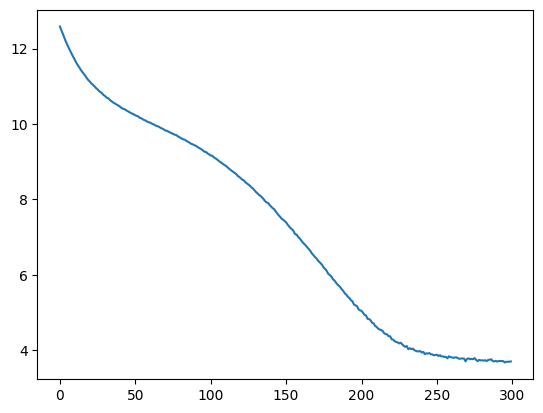

In [63]:
plt.plot(range(epochs), losses)

In [64]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))

In [65]:
loss

tensor(3.6948)

In [66]:
for i in range(10):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{1}.) PREDICTED: {y_val[i].item():8.2f} TRUE: {y_test[i].item():8.2f} DIFFERENCE: {diff}')

1.) PREDICTED:     4.51 TRUE:     2.90 DIFFERENCE: 1.6108779907226562
1.) PREDICTED:    25.01 TRUE:     5.70 DIFFERENCE: 19.31259822845459
1.) PREDICTED:     9.06 TRUE:     7.70 DIFFERENCE: 1.3633079528808594
1.) PREDICTED:    14.83 TRUE:    12.50 DIFFERENCE: 2.3269758224487305
1.) PREDICTED:     5.68 TRUE:     4.10 DIFFERENCE: 1.57814359664917
1.) PREDICTED:     3.06 TRUE:     5.30 DIFFERENCE: 2.2375237941741943
1.) PREDICTED:     7.39 TRUE:     3.70 DIFFERENCE: 3.687880754470825
1.) PREDICTED:    15.27 TRUE:    14.50 DIFFERENCE: 0.7737226486206055
1.) PREDICTED:     3.18 TRUE:     5.70 DIFFERENCE: 2.5182130336761475
1.) PREDICTED:     9.99 TRUE:    10.10 DIFFERENCE: 0.10884857177734375


In [67]:
torch.save(model.state_dict(), 'TaxiModel.pt')